# CS 237 Spring 2021, HW 03 

#### Due date: Friday February 19th at Midnight (1 minute after 11:59pm on 2/11) via Gradescope (6 hour grace period)

<strong> Late policy:</strong> You may submit the homework up to 24 hours late for a 10% penalty. Hence, the late deadline is Saturday 2/20 at Midnight (with the same 6 hour grace period). 

#### General Instructions

Please complete this notebook by filling in solutions where indicated. Be sure to "Restart and Run All" from the Kernel menu before <a href="https://www.cs.bu.edu/fac/snyder/cs237/HWSubmissionInstructions.html">submitting to Gradescope</a>.  

There are 10 analytical problems and one extended programming problem (worth as much as two problems). An introductory video will be posted on YT for
the analytical problems, and the programming problem will be covered Friday in lab. 

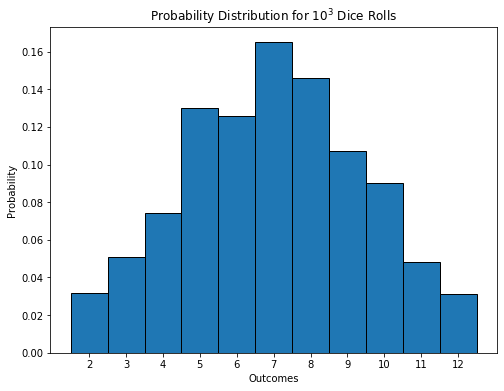

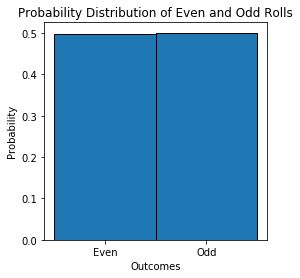

In [23]:
# Here are some imports which will be used in code that we write for CS 237

# IMPORTANT:     DO NOT MAKE ANY OTHER IMPORTS WITHOUT DISCUSSING WITH PROFESSOR SNYDER

# Imports used for the code in CS 237

import numpy as np                # arrays and functions which operate on arrays, plus math functions
import matplotlib.pyplot as plt   # normal plotting 
import math                       # You may use the math library if you really want, but
                                  #    I recommend you use the numpy library for all mathematical operations.
                                  #    Examples of use are in the notebook NumpyTutorial.ipynb on the class web site. 

# We will use these two functions, see note on introduction to lab problems

from numpy.random import seed, random, randint, choice, shuffle

from collections import Counter   # Essential for creating distributions from experiments
  
# This is an improved version of the function from HWs 01 and 02, which allows you to change the
# size and also the labels on the X axis

def show_distribution(outcomes, title='Probability Distribution', my_xlabels = [], my_figuresize = (8,6)):
    plt.figure(figsize=my_figuresize)
    num_trials = np.size(outcomes)
    X = range( int(min(outcomes)), int(max(outcomes))+1 )    # 
    freqs = Counter(outcomes)
    Y = [freqs[i]/num_trials for i in X]
    plt.bar(X,Y,width=1.0,edgecolor='black')
    if my_xlabels != []:
        plt.xticks(X, my_xlabels)
    elif (X[-1] - X[0] < 30):
        ticks = range(X[0],X[-1]+1)
        plt.xticks(ticks, ticks) 
    plt.xlabel("Outcomes")
    plt.ylabel("Probability")
    plt.title(title)
    plt.show()
    
# Demonstration of the function
dice_rolls = [ (randint(1,7) + randint(1,7)) for k in range(10**3) ]    # 1000 rolls of two dice

show_distribution(dice_rolls, "Probability Distribution for $10^3$ Dice Rolls")    # notice the Latex in the title!

show_distribution([ (x % 2) for x in dice_rolls ], 
                  "Probability Distribution of Even and Odd Rolls", 
                  my_xlabels=['Even', 'Odd'], my_figuresize=(4,4) )

## Analytical Problems Introduction




### Note on format of numeric answers.

 
The overall principle in writing your answers is to *make the problem easy to grade*! No one benefits from your
work if they can not understand where the answer is or what value is actually being represented. 

There is no need to use Python to do the calculations or formatting for the analytical problems, although
sometimes it is helpful to check your calculations.  You can insert a Code cell temporarily somewhere
and type in the expression and cut and paste your answer into the Markdown cell with your solution.  

Here are the guidelines you should follow for the remainder of the course:

- Quantitative answers must be given as small fractions, or in decimal. Small fractions are fine, as long as they are reduced (no common factors between the numerator and denominator) and not too complicated.  So 1/2, 3/8, and 5/32 are fine, but 1215/1944 (= 3/8) is not.  

- Quantitative answers in decimal should be given to 4 significant digits, unless very small, in which case you should give in scientific notation to 4 significant digits (if possible). We're flexible, but don't give an answer 20 digits long!

- Whenever possible, show your answer in Latex (we'll do more on this later) inside a box, by enclosing it in the syntax:

             $\boxed{  your answer   }$
             
for example, 

            Here is pi:  $\boxed{3.1416}$.
             
Here is pi:  $\boxed{3.1416}$. 

In the next text box are some useful `numpy` functions if you want to use them (not required as long as
you follow the guidelines above). 



In [24]:
# If you want to round something to 4 digits, you can use the 
# function np.around( floating-point number, number-of-significant-digits ):

print('Here is the number pi:', np.pi)
print('Here is the number pi rounded to 4 digits:', np.around(np.pi,4) )
print()

# using np.around
print(np.around(np.pi,4))           # this is perfect
print(np.around(np.pi/1000,4))      # this is ok
print(np.around(np.pi/100000,4))    # NOT OK,  this returns an inaccurate and unhelpful 0.0
print()

# using np.format_float_scientific(x,precision=4)

print( np.format_float_scientific(np.pi/1000,precision=4) )
print( np.format_float_scientific(np.pi/1000000,precision=4) )

Here is the number pi: 3.141592653589793
Here is the number pi rounded to 4 digits: 3.1416

3.1416
0.0031
0.0

3.1416e-03
3.1416e-06


### Problem 1

Suppose you roll a single die $n$ times, $n>0$. Give the following probabilities in terms of $n$:

(A)  The number 4 is observed all $n$ times;

(B)  You *never* see the number 4 in any of the $n$ rolls; 

(C)  Each of the $n$ rolls shows an even number;

(D)  The $n$ rolls alternate even and odd numbers, starting with even (for example:  2  5  4  1  6 5 ....); 

(E)  In the $n$ rolls, each of the numbers 1 and 6 are observed at least once. 

Hint for (E): Use the Inverse Method!

**Solution:**

a) $\boxed{  \frac{1}{6^n}   }$

b) $\boxed{  \frac{5^n}{6^n}   }$ 

c) $\boxed{  \frac{1}{2^n}   }$

d) $\boxed{  \frac{1}{2^n}   }$

e) $\boxed{  1- \frac{(2*5^n) - 4^n}{6^n}   }$


### Problem 2 

Suppose you roll two fair dice and count the number of dots showing. What is the probability of a sum of 5 if

(A) the second roll is not 3?

(B) they land on different numbers?



<b>Solution:</b>

a) if the second roll is not a 3, then you need a 1+4, 3+2, 4+1... but since the second roll is not a 3, there are 5 other numbers it could be (while the first has 6 possible numbers) => 3/(5*6)
    answer = $\boxed{  \frac{1}{10}   }$
    
b) if they land on different numbers, then you need 1+4, 2+3, 3+2, 4+1, out of 36 possible combinations. Therefore, answer = $\boxed{  \frac{1}{9}   }$

### Problem 3

Do problem 23 from the End Of Chapter Problems in Section 1.5.

**Solution:**

A) $\boxed{  \frac{0.2}{0.35}   }$

B) $\boxed{  \frac{0.3}{0.7}   }$

C) $\boxed{  \frac{0.25}{0.7}   }$

D) $\boxed{  \frac{1}{2}   }$

### Problem 4

Do problem 24 from the End Of Chapter Problems in Section 1.5.

**Solution:**


A) $\boxed{  \frac{3}{10}   }$

B) $\boxed{  \frac{2}{5}   }$

C) $\boxed{  \frac{5}{6}   }$

### Problem 5

Do problem 25 from the End Of Chapter Problems in Section 1.5.

**Solution:**

We are given 600 students, of which 80 lived off-campus and got an A (out of 120 studennts who got an A). Therefore, we have 40 students who lived on-campus and got an A. The probability that a student who took the course lived on campus and got an A is $\frac{1}{15}$. Likewise, the probability that a student gets an A ($\frac{1}{5}$) multiplied by the probability that a student lives on campus ($\frac{1}{3}$) is also $\frac{1}{15}$. Therefore, since both are equal, the data suggests that **"getting an A" and "living on campus" are independent**

### Problem 6

Do problem 34 from the End Of Chapter Problems in Section 1.5.

**Solution:**

Q: toss a die twice (X and Y). A is when X=2, B is when X+Y = 7, C is when Y=3.

1) P(A) = $\frac{1}{6}$ and P(B) = $\frac{1}{6}$. B = { (1,6), (2,5), (3,4), (4,3), (5,2), (6,1) }, thus |A n B| = 1. Therefore, P(A n B) = $\frac{1}{36}$. Likewise, P(A) * P(B) = $\frac{1}{36}$. **Therefore, A and B are independent**


2) P(A) = $\frac{1}{6}$ and P(C) = $\frac{1}{6}$, and thus P(A n C) = $\frac{1}{36}$ because you only have one combination out of 36 that satisfies the intersection (2,7). Likewise, P(A) * P(B) is also equal to $\frac{1}{36}$. **Therefore, A and C are independent**


3) P(B) = $\frac{1}{6}$ and P(C) = $\frac{1}{6}$. |B n C| = 1 because it is only when X=4 and Y=3 that B and C intersect. Therefore P(B n C) = $\frac{1}{36}$. Likewise, P(B) * P(C) is also equal to $\frac{1}{36}$. **Therefore, B and C are independent**


4) P(A) = $\frac{1}{6}$, P(B) = $\frac{1}{6}$, P(B) = $\frac{1}{6}$. But |A n B n C| = 0 because when X=2 and Y=3, condition B cannot be met. Thus, P(A n B n C) = 0. However, P(A) * P(B) * P(C) = $\frac{1}{216}$. **Therefore, A, B and C are dependent.**

### Problem 7

Do problem 35 from the End Of Chapter Problems in Section 1.5.

**Solution:**


Let A = the game started with a first toss being Heads. Let B = I win because there was 2 consecutive heads (HH). We are given that P(H) = p and that I have won the game; we can also say that P(T) = 1-p, which we can denote as q. We want to ultimately find P(A|B) - the probability the first coin toss was head given that I won, such that P(A|B) = $\frac{P(A n B)}{P(B)}$. Let alpha = the probability that I win with the last toss being heads. 

Therefore, P(A n B) = P(H) * alpha. And P(B) =  (P(H) * alpha) * (1+q). Since we know that P(H) = p, and q is 1-p, we can simplify this solution as: $\boxed{\frac{p * alpha}{2-p}}$. 

### Problem 8

This is a problem about a standard deck of 52 playing cards:

<img src="https://www.cs.bu.edu/fac/snyder/cs237/images/PlayingCards.png" align='Left'>

Supposing you shuffle a  deck of playing cards thoroughly and draw a single card, give the probability that the card is:

(A) The King of Diamonds

(B) A black card 

(C) Not a face card (i.e., not Jack, Queen, King) 

(D) A spade or an Ace 

(E) Neither a black card nor a face card   (= "(not a black card) and (not a face card)")

Hint: Remember in D that *or* in English is the "inclusive or," not the "exclusive or". 

**Solution:**


A) There is only one King of Diamonds, thus the solution is: 
$\boxed{  \frac{1}{52}   }$

B) There are 26 total black cards out of 52, thus the solution is: 
$\boxed{  \frac{1}{2}   }$

C) There are 40 non-face cards out of 52, thus the solution is:
$\boxed{  \frac{10}{13}   }$

D) There are 4 Ace cards, and 13 spade cards, however they overlap with one card, and so there are 16 spade or ace cards out of 52. This can be simplified as: $\boxed{  \frac{4}{13}   }$

E) There are 20 red cards that are not face cards (and also not black), out of 52. This can be simplified as: 
$\boxed{  \frac{5}{13}   }$

### Note on choosing randomly

There are two ways to choose objects from a collection in probability: with replacement and without replacement:

  - **With Replacement**:  After an object, such as a playing card, is selected from a collection (such as a deck of cards), it is put back into the collection before the next selection. This is the usual situation when choosing virtual objects such as letter and numbers. In general, the probabilities of various events do not change as objects are chosen, because by putting the object back, you are ensuring that each choice is independent.  
  
  
  - **Without Replacement**:  After the object is selected, it is NOT put back into the collection. This is the usual situation in card games, where the dealer chooses cards to distribute to the players, and they are given to the players, and not put back in the deck. In general, the probability of events will change, as the sample set is changed by the removal of one object. The choices are NOT independent. 

### Problem 9

This is again, a problem about playing cards. We will choose 2 cards with replacement. 

Supposing you shuffle a  deck of playing cards thoroughly and draw two cards:  you draw the first card, put it *back in the deck*, shuffle it thoroughly and draw a second card. Give the probability that:

(A) Both cards were face cards;

(B) The second card was not the exact same card as the first one; 

(C) The two cards were different colors;  

(D) Neither card was a face card; 

(E) If the first card was black, then the second card was red; 

Hint: The probabilities do not change for the second card, since you start all over again with the same
randomized deck. 

**Solution:**

A) There's 12/52 * 12/52 chance both cards will be a face card, which can be simplified as
$\boxed{\frac{9}{169}}$

B) There are 51 other cards that are dfiferent than the first selected card, thus we have
$\boxed{  \frac{51}{52}   }$

C) We have 25% of having B then R, and 25% of having R then B. Summed up we have
$\boxed{  \frac{1}{2}   }$

D) There are 40 non-face cards, thus we have 40/52 * 40/52, which can be simplified as 
$\boxed{  \frac{100}{169}   }$

E) Given that we already picked a black card, we have a 50% chance of choosing a red card next, thus
$\boxed{  \frac{1}{2}   }$

### Problem 10

Now we will draw two cards without replacement. Suppose you shuffle a  deck of playing cards thoroughly and draw the first two cards on the top of the deck (without returning the first card and without shuffling again). Give the probability that

(A) Both cards were red;

(B) The first card was red and the second card was a face card; 

(C) The two cards were different colors; 

(D) Neither card was a face card;

(E) If the first card was black, then the second card was red;

Hint: The probabilities change, since
you are drawing the second card from a deck with only 51 cards, the first card having been removed. You have to
account for what happened when the first card was removed. A tree diagram, of course, can help, but you don't have to provide it. 

**Solution:**

A) Since there are 26/52 chance of picking red in first round, we then have 25/51 chance of choosing red again, which can be simplified as: 
$\boxed{  \frac{25}{102}   }$

B) Probability that the first card being a red face card is 6/52, and the next card being a face is 11/51. However, the probability that the first card being a red non-face card is 20/52, and the next card being a face card is 12/51. Therefore, (6/52 * 11/51) + (20/52 * 12/51) is equal to: 
$\boxed{  \frac{23}{51}   }$

C) There is 1/2 * 26/51 of having B then R, and likewise for R then B. Combined, we have: 
$\boxed{  \frac{26}{51}   }$

D) There are 40/52 chance of not picking face card in first round, and 39/51 in second round. The solution can be expressed as: 
$\boxed{  \frac{30}{51}   }$

E) Since it is given that the first card is black, we then have 26 red cards to choose from out of 51, thus the solution is: 
$\boxed{  \frac{26}{51}   }$

## Lab Problems: Shuffling and Choosing from a List

We will continue to investigate methods for simulating various kinds of random processes, with the same strategy as in the last HW:  You will write your own versions of standard functions from the `numpy.random` library: last time you wrote your own versions of `random()` and `randint(...)`; in this lab you will write your own versions of the functions  `choice(...)`, and `shuffle(...)`.  You may read about them further <a href="https://numpy.org/doc/1.16/reference/routines.random.html">here</a>, but all the information you need will be presented here, and then we will do some experiments involving a standard deck of 52 playing cards, reproducing experimentally one of the problems you solved analytically above. 

**Important Note:** My educational strategy here is to have you create your own versions of the standard `numpy.random` functions, in order to understand deeply how they work. After that goal is achieved, however, it is better to use the library functions, not your own.  The standard library functions are the ones you will use in the future, and in any case they are implemented using state-of-the art random number generators and are the most efficient possible implementations.  There is no reason to use your own (presumably less well-implemented) once the goal of understanding is finished. 

Therefore, in this lab, you will use the standard and `randint(...)` . Do NOT use your own `my_randint(...)`. 
There is only one difference between your functions and the standard ones, and that is that `numpy` functions in general will work on lists or arrays, applying the function to every member of the list. You should get used to this, and to using list comprehensions, as it leads to much more concise and elegant code, with fewer bugs!

In [25]:
# Reminder how these work

# print out an array of 10 random numbers in range [0..1)
print( random(10))

# print out an array of 10 random numbers in range [l, ..., 6]
print( randint(1,7,10))

[0.71187045 0.05373355 0.39622274 0.16743582 0.82190391 0.70052862
 0.8830776  0.96657511 0.77474761 0.99423308]
[2 4 4 4 2 3 6 1 5 3]


### More Random Functions:  Choice and Shuffle

In more complicated kinds of problems, we need to do more sophisticated things with a collection, such
as when we perform simulations about cards, say if we want to verify the answers to Problems 8 and 9 above. 

There are two useful `numpy.random` functions that we will learn to implement outselves

### Numpy's shuffle function

In [26]:
die_roll = [1,2,3,4,5,6]

# Run this cell a few times to see what it does
# Note that it changes the list/array, and does not return a list


shuffle( die_roll )

die_roll

[3, 4, 6, 5, 2, 1]

### Numpy's choice function:  random sampling

         numpy.random.choice(a, size=None, replace=True)

In [27]:
# Randomly choose one member of a list or array

die_roll = [1,2,3,4,5,6]

print(  choice( [1,2,3,4,5,6] ) )

# Vector version!  

print(  choice( [1,2,3,4,5,6], size=25 ) )
 
#  You can also choose "without replacement" (the default is WITH replacement)

print(  choice( [1,2,3,4,5,6], size=5, replace=False))

5
[2 6 3 1 4 6 4 6 1 4 3 6 2 6 4 2 6 4 4 5 4 5 1 4 6]
[5 2 1 3 6]


In [28]:
cards = ['a', 'b', 'c', 'd']
cards

cards[  randint(len(cards))  ]

'd'

##  Problem 11: Shuffling and Choosing from a List   (worth 10 points)
Now we will we will create our own versions of the 
<code>shuffle(...)</code> and <code>choice(...)</code> functions, which you can read about
<a href="https://numpy.org/doc/1.16/reference/routines.random.html">here</a>.

All you need to do is to demonstrate these as shown. We could test them using probability distributions, but it will sufficient to check the results by eye...   You could also test them by comparing
them with the numpy versions, with slight differences as specified
below.   The main detail, which I admit is a bit fussy, is
that some numpy functions return a single value by default, 
and a list of values if you specify a size. 

<strong>NOTE: In this problem, you may use <code>seed(...)</code> and <code>randint(...)</code>from the numpy random library but no other
library functions which generate random results. </strong>


### (A): Choosing from a list with replacement

This part is easy: to choose a member of a list randomly and with replacement, simply generate a random integer as an index and return the member at the index. The only small complication is that when size is not specified, it should return a single element; when size is specified, return a list of such randomly-chosen elements. 


In [29]:
# Choose elements from a list with replacement. If size == None, then
# return a single element, else create a list of length size, filled with
# randomly chosen elements from the list  

def choice_with_replacement(X,size=None):
    if size == None:
        return X[randint(len(X))]                              # your code here
    else:
        return [ choice(X) for k in range(size) ]

# Test it!

seed(0)
X = list(range(1,7))

print("Here is one choice:", choice_with_replacement(X))      # should be 5
print("Here are multiple choices:")
for k in range(10):
    print(choice_with_replacement(X,size=k))                  # last one should be [1, 2, 2, 2, 1, 3, 5, 4, 4]


Here is one choice: 5
Here are multiple choices:
[]
[6]
[1, 4]
[4, 4, 2]
[4, 6, 3, 5]
[1, 1, 5, 3, 2]
[1, 2, 6, 2, 6, 1]
[2, 5, 4, 1, 4, 6, 1]
[3, 4, 1, 2, 4, 6, 4, 4]
[1, 2, 2, 2, 1, 3, 5, 4, 4]


### (B): Shuffling a list

Shuffling a deck of cards means to permute the order sufficientlly that it appears to be random. 
One could simply keep exchanging members of the list, but how many such exchanges is necessary?

A better method is the following, known as the  <a href="https://en.wikipedia.org/wiki/Fisher%E2%80%93Yates_shuffle">Fisher-Yates Shuffle</a>, which works in $O(n)$. Basically, you maintain a shuffled part of the list and an unshuffled part of the list, and at each step you randomly select an element from the unshuffled part and move it to the shuffled part. 
<pre>
-- To shuffle an array A of n elements (indices 0..n-1):
for i from n−1 downto 1 do
     j ← random integer such that 0 ≤ j ≤ i
     exchange A[j] and A[i]
</pre>
Note that this shuffle works in-place.  

Here is a trace of what happens to a list [1,...,10] in 
a sample run of the algorithm:

<pre>
i=9 j=5
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i=8 j=0
[1, 2, 3, 4, 5, 10, 7, 8, 9, 6]
i=7 j=3
[9, 2, 3, 4, 5, 10, 7, 8, 1, 6]
i=6 j=3
[9, 2, 3, 8, 5, 10, 7, 4, 1, 6]
i=5 j=3
[9, 2, 3, 7, 5, 10, 8, 4, 1, 6]
i=4 j=1
[9, 2, 3, 10, 5, 7, 8, 4, 1, 6]
i=3 j=3
[9, 5, 3, 10, 2, 7, 8, 4, 1, 6]
i=2 j=1
[9, 5, 3, 10, 2, 7, 8, 4, 1, 6]
i=1 j=0
[9, 3, 5, 10, 2, 7, 8, 4, 1, 6]
</pre>

In [30]:
# Shuffle using the Fisher-Yates algorithm.
# This will modify the list in place, permanently changing it

def my_shuffle(X):
    # your code here
    for i in range(1,len(X)):
        high = len(X)-i
        j = choice(high+1)
        temp = X[j]
        X[j] = X[high]
        X[high] = temp

# Test it!

seed(0)
X = [1,2,3,4,5,6,7,8,9,10]
for k in range(5):
    my_shuffle(X)              # last one should be [7, 8, 9, 3, 5, 10, 2, 6, 1, 4]
    print(X)

[3, 9, 5, 10, 2, 7, 8, 4, 1, 6]
[10, 7, 9, 5, 6, 1, 3, 8, 4, 2]
[9, 5, 4, 6, 1, 7, 10, 3, 2, 8]
[10, 5, 8, 4, 3, 7, 2, 9, 6, 1]
[7, 8, 9, 3, 5, 10, 2, 6, 1, 4]


### (C) Choosing without replacement from a list

If you don't care much about efficiency, then to sample WITHOUT replacement (as you do in dealing Poker hands), you should just slice the list produced by shuffling to return a
list of the required length `size`. 

HOWEVER, choice does not change the list, so make sure to make a copy, and shuffle that!


In [31]:
# Return a list of length size of elements from the list X; shuffle 
# the WHOLE list and slice an initial part of the list and return it.

# Make a copy of the list, since shuffle will change the this, but this function should NOT change its input. 

def choice_without_replacement(X,size=None):
    X1 = list(X)
    # your code here
    if size == None:
        return X1[randint(len(X))]
    my_shuffle(X1)
    return (X1[:size])
    
# Test it!
   
seed(0)      
X = [1,2,3,4,5,6,7,8,9,10]
for k in range(1,11):
    print(choice_without_replacement(X,k))          # last one should be [2, 3, 6, 1, 9, 4, 8, 10, 7, 5]
    
seed(0)
print("Here is one choice:", choice_without_replacement(X))     # should be 6

[3]
[4, 6]
[3, 4, 9]
[7, 2, 10, 3]
[6, 3, 8, 5, 2]
[2, 9, 10, 6, 3, 7]
[4, 3, 2, 8, 9, 7, 6]
[1, 10, 3, 4, 6, 7, 8, 2]
[8, 9, 10, 2, 5, 6, 4, 7, 1]
[2, 3, 6, 1, 9, 4, 8, 10, 7, 5]
Here is one choice: 6


### (D) Bounded Choosing without replacement from a list

There is one inefficiency in the sampling algorithm using the Fisher-Yates shuffle: it shuffles the whole list, and then only returns a part of the list. With cards, this is exactly what you do, but we might want to think of the most efficient way to do it.
For example, if you are dealing out five cards, you could stop the algorithm after five iterations through the loop (picking only five numbers randomly from the whole deck). 
Note that you can't just shuffle part of the list: you have to randomly select numbers from the whole list, making sure you don't choose the same number twice. Stopping the loop early will shuffle only the last part of the list (if you follow the Fisher-Yates algorithm, which works from the back forward through the list). 

Fill in the template below to create a better version of the previous function which does precisely this. 



In [32]:
# Return a list of length size of elements from the list X; shuffle 
# the list and slice of a part of the list, at the end of the list 

# Make a copy of the list before shuffling it!@

def bounded_choice_without_replacement(X,size=None):
    # your code here
    res = list(X)
    i = len(res)-1
    if size == None: return X[randint(len(X))]
    
    while i > (len(res)-1-size):
            j = randint(i+1)
            temp = res[i]
            res[i] = res[j]
            res[j] = temp
            i = i-1
            
    return res[i+1:]

# Test it! 
      
seed(0)

X = [1,2,3,4,5,6,7,8,9,10]
for k in range(1,11):
    print(bounded_choice_without_replacement(X,k))      # last one should be [2, 10, 1, 6, 3, 9, 7, 4, 8, 5]

    
seed(0)
print("Here is one choice:", bounded_choice_without_replacement(X))     # should be a 6

[6]
[4, 1]
[2, 8, 4]
[5, 3, 6, 4]
[5, 10, 1, 7, 8]
[10, 1, 9, 8, 7, 2]
[10, 1, 4, 5, 2, 9, 6]
[5, 7, 2, 9, 4, 3, 1, 6]
[9, 8, 5, 6, 2, 1, 7, 10, 4]
[2, 10, 1, 6, 3, 9, 7, 4, 8, 5]
Here is one choice: 6


### (E) Putting it all together: the choice function

Now, to recreate the functionality of the numpy choice function, we need
to allow the user to select which option, with or without replacement,
that is desired.

This is trivial, you just need to select the appropriate function you created in (A) or (D). 

In [33]:
# Choice function with optional parameter to select with or without replacemnt. 
# We will depart from the behavior of np.random.choice in one respect: the first
# parameter MUST be a list (numpy allows an integer N to represent the list [0..N-1]).
# We also will not implement the parameter p (the probabilities for the list). 

def my_choice(X,size=None,replace=True):
    # your code here
    if replace == True:
        return choice_with_replacement(X,size)
    if replace == False:
        return bounded_choice_without_replacement(X,size)
    
    
seed(0)

X = [1,2,3,4,5,6,7,8,9,10]
for k in range(1,11):
    print(my_choice(X,k,True))      # last one should be [4, 3, 8, 3, 1, 1, 5, 6, 6, 7]

print() 

seed(0)

X2 = [1,2,3,4,5,6,7,8,9,10]
for k in range(1,11):
    print(my_choice(X2,k,False))   # last one should be [2, 10, 1, 6, 3, 9, 7, 4, 8, 5]
    
seed(0)

print("Here is one choice:", my_choice(X))     # should be a 6

[6]
[1, 4]
[4, 8, 10]
[4, 6, 3, 5]
[8, 7, 9, 9, 2]
[7, 8, 8, 9, 2, 6]
[10, 9, 10, 5, 4, 1, 4]
[6, 1, 3, 4, 9, 2, 4, 4]
[4, 8, 1, 2, 10, 10, 1, 5, 8]
[4, 3, 8, 3, 1, 1, 5, 6, 6, 7]

[6]
[4, 1]
[2, 8, 4]
[5, 3, 6, 4]
[5, 10, 1, 7, 8]
[10, 1, 9, 8, 7, 2]
[10, 1, 4, 5, 2, 9, 6]
[5, 7, 2, 9, 4, 3, 1, 6]
[9, 8, 5, 6, 2, 1, 7, 10, 4]
[2, 10, 1, 6, 3, 9, 7, 4, 8, 5]
Here is one choice: 6
